In [1]:
#Importing packages
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from keras.preprocessing import image
from PIL import Image
import cv2

In [2]:
# Warning handler
import warnings
warnings.filterwarnings('ignore')
# Loading Data
handwriting_mnist = keras.datasets.mnist      #loading MNIST dataset
(train_images,train_labels),(test_images,test_labels) = handwriting_mnist.load_data()        #splitting the data into training and testing images and labels
train_images = train_images.reshape(len(train_images),28,28,1)             #reshaping to a 28x28 image
test_images = test_images.reshape(len(test_images),28,28,1)                #reshaping to a 28x28 image

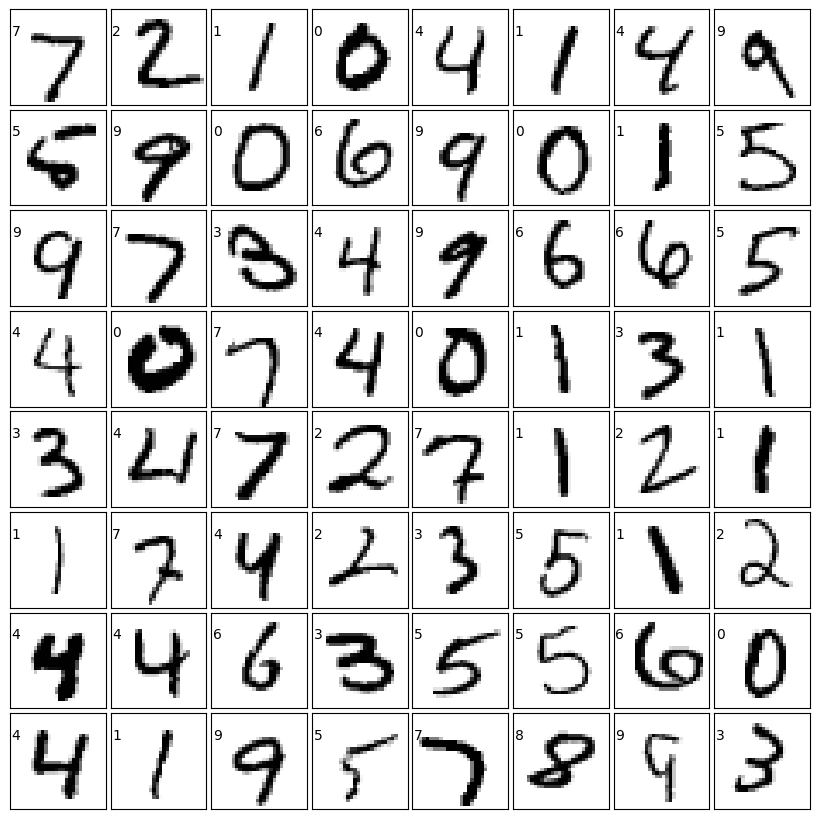

In [3]:
fig = plt.figure(figsize=(8, 8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(test_images[i].reshape(28,28), cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(test_labels[i]))
plt.show()                                              #plotting some data for test data visualization 

In [4]:
#Creating model
model = keras.models.Sequential([keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),           #convolution filter
                                 keras.layers.MaxPool2D(2,2),                                                     #maxpooling layer of 2x2 pooling size
                                 keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),           #another convolution filter
                                 keras.layers.MaxPool2D(2,2),                                                     #again a maxpooling layer of 2x2 pooling size
                                 keras.layers.Flatten(),                                                          #flattening the 7x7 images into a series of 128 values
                                 keras.layers.Dense(128,activation='relu'),                                       #mapping to a dense layer of 128 neurons that are 
                                 keras.layers.Dense(10,activation='softmax')])                                    #connected to the categorical output layer of 10 neurons.

In [5]:
print(model.summary())             #printin the model summary

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [6]:
model.compile(optimizer='adam',metrics=['acc'],loss='sparse_categorical_crossentropy')              #compiling model with adam optimizer and particular cross-entropy loss function
history=model.fit(train_images,train_labels,epochs=100)                                             #storing in history to further plot the accuracy and loss wrt number of epochs

Epoch 1/100
1875/1875 [==============================] - 17s 5ms/step - loss: 0.3490 - acc: 0.9489
Epoch 2/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0667 - acc: 0.9806
Epoch 3/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0515 - acc: 0.9845
Epoch 4/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0434 - acc: 0.9868
Epoch 5/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0363 - acc: 0.9891
Epoch 6/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0323 - acc: 0.9900
Epoch 7/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0273 - acc: 0.9916
Epoch 8/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0236 - acc: 0.9926
Epoch 9/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0240 - acc: 0.9933
Epoch 10/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0201 - acc: 0.9945
Epoch 11/100
1875/

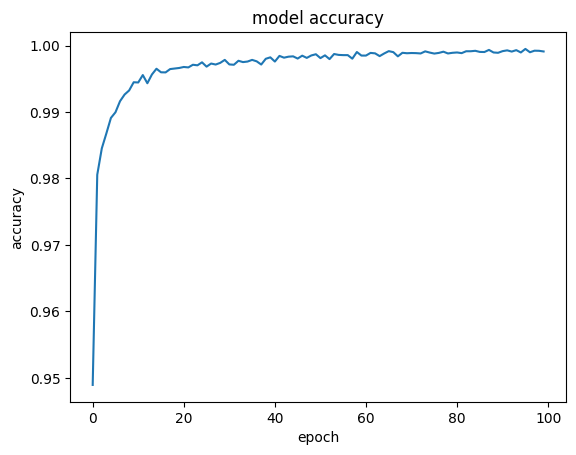

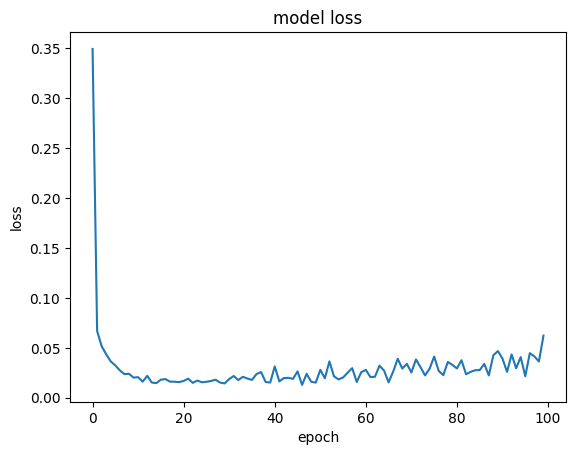

In [7]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [8]:
model.evaluate(test_images,test_labels)                    #evaluating the model on test data

313/313 [==============================] - 1s 3ms/step - loss: 1.4198 - acc: 0.9886


[1.4197535514831543, 0.9886000156402588]

In [9]:
val=model.predict(test_images)                             #predicting label on the test data

313/313 [==============================] - 1s 2ms/step


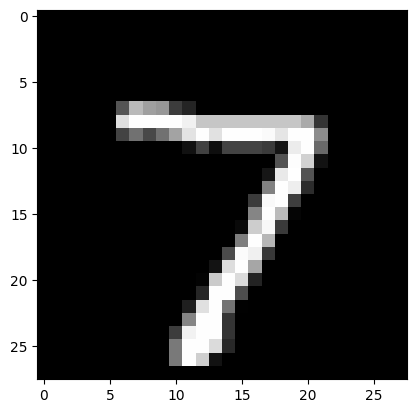

In [10]:
plt.imshow(test_images[0],cmap="gray")                     #plotting the first test data

In [11]:
val[0]                                                     #getting the label out of this which should be equal to the test label

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [12]:
#Importing the Street View House Numbers(SVHM) dataset
import scipy.io as sio
!wget http://ufldl.stanford.edu/housenumbers/train_32x32.mat                    
!wget http://ufldl.stanford.edu/housenumbers/test_32x32.mat
train = sio.loadmat('train_32x32.mat')
test = sio.loadmat('test_32x32.mat')

--2023-04-29 15:55:26--  http://ufldl.stanford.edu/housenumbers/train_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182040794 (174M) [text/plain]
Saving to: ‘train_32x32.mat.1’

train_32x32.mat.1   100%[===================>] 173.61M  54.8MB/s    in 4.0s    

2023-04-29 15:55:30 (43.4 MB/s) - ‘train_32x32.mat.1’ saved [182040794/182040794]

--2023-04-29 15:55:30--  http://ufldl.stanford.edu/housenumbers/test_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64275384 (61M) [text/plain]
Saving to: ‘test_32x32.mat.1’

test_32x32.mat.1    100%[===================>]  61.30M  31.1MB/s    in 2.0s    

2023-04-29 15:55:32 (31.1 MB/s) - ‘test_32x32.mat.1’ saved [642

In [13]:
train                         #printing the validation data(it is training data for SVHM but I am using this a validation data set for my model)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Mon Dec  5 21:09:26 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[[[ 33,  84,  19, ...,  92, 190, 216],
          [ 30,  76,  54, ...,  78, 188, 217],
          [ 38,  59, 110, ..., 101, 191, 212]],
 
         [[ 15,  86,  20, ...,  94, 205, 221],
          [ 23,  73,  52, ...,  82, 203, 222],
          [ 19,  66, 111, ..., 105, 206, 217]],
 
         [[ 15,  77,  25, ..., 114, 220, 226],
          [ 17,  78,  57, ..., 101, 218, 227],
          [ 19,  56, 116, ..., 125, 220, 221]],
 
         ...,
 
         [[ 72,  90,  65, ..., 200, 229, 200],
          [ 65,  78, 144, ..., 201, 231, 199],
          [ 56,  69, 223, ..., 203, 224, 191]],
 
         [[ 82,  88,  78, ..., 192, 229, 193],
          [ 77,  77, 148, ..., 193, 229, 188],
          [ 57,  67, 218, ..., 195, 224, 182]],
 
         [[ 89,  88,  98, ..., 190, 229, 197],
          [ 79,  78, 158, ..., 191, 228, 189],
          [ 59,  66, 220, 

In [14]:
train_img=train['X']          #storing the image details i.e. validation images 
train_img                     #printing the same

array([[[[ 33,  84,  19, ...,  92, 190, 216],
         [ 30,  76,  54, ...,  78, 188, 217],
         [ 38,  59, 110, ..., 101, 191, 212]],

        [[ 15,  86,  20, ...,  94, 205, 221],
         [ 23,  73,  52, ...,  82, 203, 222],
         [ 19,  66, 111, ..., 105, 206, 217]],

        [[ 15,  77,  25, ..., 114, 220, 226],
         [ 17,  78,  57, ..., 101, 218, 227],
         [ 19,  56, 116, ..., 125, 220, 221]],

        ...,

        [[ 72,  90,  65, ..., 200, 229, 200],
         [ 65,  78, 144, ..., 201, 231, 199],
         [ 56,  69, 223, ..., 203, 224, 191]],

        [[ 82,  88,  78, ..., 192, 229, 193],
         [ 77,  77, 148, ..., 193, 229, 188],
         [ 57,  67, 218, ..., 195, 224, 182]],

        [[ 89,  88,  98, ..., 190, 229, 197],
         [ 79,  78, 158, ..., 191, 228, 189],
         [ 59,  66, 220, ..., 193, 223, 186]]],


       [[[ 28,  85,  21, ...,  92, 183, 204],
         [ 39,  77,  53, ...,  78, 182, 205],
         [ 35,  61, 110, ..., 103, 186, 202]],

    

In [15]:
#Reshaping the validation image dataset so that it can be given as input to our model
final_list = []
for i in range(train_img.shape[-1]) :
  im1 = Image.fromarray((train_img[:,:,:,i]).astype(np.uint8))
  im2 = im1.resize((28,28))
  im2 = np.array(im2)
  grayscale = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)
  im2= grayscale.reshape((28,28,1))
  final_list.append(im2)
final_list = np.array(final_list)
final_list.shape

(73257, 28, 28, 1)

In [16]:
y_pred = model.predict(final_list)                    #final prediction on the reshaped dataset
ground = np.array(train['y'])
num_cor = 0
for i in range(len(ground)) :
  num_cor += int(ground[i] == np.argmax(y_pred[i,:])) + (ground[i]==10 and np.argmax(y_pred[i,:])==0)           #for getting accuracy
print(f'Accurcy : {num_cor/len(ground)}')

2290/2290 [==============================] - 4s 2ms/step
Accurcy : [0.16641413]


In [17]:
y_pred[0,:] 

array([4.49295534e-09, 1.18359574e-03, 8.70996795e-04, 7.00151770e-10,
       9.97496307e-01, 1.83923866e-11, 1.21379235e-04, 1.19715501e-12,
       3.27697722e-04, 1.75190418e-14], dtype=float32)

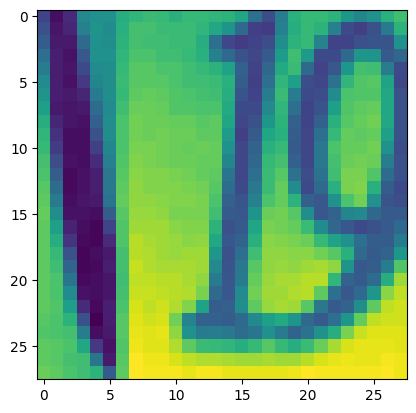

In [18]:
plt.imshow(final_list[0])                        #visual representation

In [19]:
np.argmax(y_pred[0,:])                          

4